Bhavani Sai Sivani Chandaka
BXC210036
Lokeswari Sonti
LXS220004
Manvitha Tangella
MXT220006
Rohith Jaina
RXJ220013

In [ ]:
!pip install yfinance


     |████████████████████████████████| 62 kB 1.2 MB/s 
     |██████████████        

*** WARNING: max output size exceeded, skipping output. ***

     |████████████████████████████████| 8.0 MB 6.3 MB/s 
     |████████████████████████████████| 502 kB 48.8 MB/s 
     |████████████████████████████████| 112 kB 22.0 MB/s 
     |████████████████████████████████| 114 kB 46.6 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Not uninstalling pytz at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-fbf1f95a-cf25-46f3-b1ec-68a0d36ee182
    Can't uninstall 'pytz'. No files were found to uninstall.
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Not uninstalling requests at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-fbf1f95a-cf25-46f3-b1ec-6

In [ ]:
# For data manipulation
import numpy as np
import pandas as pd

# To fetch financial data
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [ ]:
# Set the ticker as 'EURUSD=X'
forex_data = yf.download('USDINR=X')

# Set the index to a datetime object
#forex_data.index = pd.to_datetime(forex_data.index)

forex_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
forex_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.615002,45.709999,45.709999,0
1,2003-12-02,45.709000,45.719002,45.560001,45.629002,45.629002,0
2,2003-12-03,45.632000,45.655998,45.474998,45.549999,45.549999,0
3,2003-12-04,45.548000,45.612999,45.519001,45.548000,45.548000,0
4,2003-12-05,45.549999,45.566002,45.449001,45.449001,45.449001,0
...,...,...,...,...,...,...,...
5096,2023-07-27,81.975502,82.230904,81.883003,81.975502,81.975502,0
5097,2023-07-28,82.374901,82.375099,82.153999,82.374901,82.374901,0
5098,2023-07-31,82.252800,82.365997,82.117996,82.252800,82.252800,0
5099,2023-08-01,82.233299,82.345398,82.222000,82.233299,82.233299,0


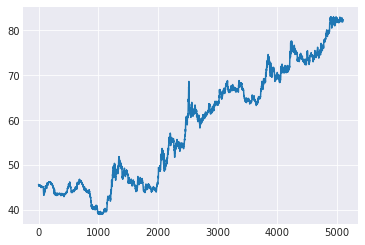

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

timeseries = forex_data[["Date","Adj Close"]]

timeseries_plot = forex_data[["Adj Close"]].values.astype('float32')

plt.plot(timeseries_plot)
plt.show()

In [ ]:
# LSTM Hyperparameters
input_size = 1
hidden_size = 4
output_size = 1
learning_rate = 0.1
num_epochs = 10

In [ ]:
#Normalize the data
min_value = np.min(timeseries_plot)
max_value = np.max(timeseries_plot)
timeseries_plot = (timeseries_plot - min_value) / (max_value - min_value)

In [ ]:
# Split the time series into input and target sequences
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
n_steps = 3  # Number of time steps to use for each prediction
X, y = split_sequence(timeseries_plot, n_steps)

In [ ]:
y = y.astype(float)

In [ ]:
from pyspark.sql.types import ArrayType, DoubleType



# Convert the NumPy arrays back to Spark DataFrames
# Convert the features array to a list of doubles
X_list = [X[i].flatten().tolist() for i in range(len(X))]



# Convert the target array to a list of doubles
y_list = y.flatten().tolist()



# Combine features and target lists into a list of tuples
data_list = [(features, target) for features, target in zip(X_list, y_list)]



# Create the DataFrame
train_data = spark.createDataFrame(data_list, ["features", "target"])



# Print the DataFrame to check its structure (optional)
train_data.show(truncate=False)

+---------------------------------------------------------------+-------------------+
|features                                                       |target             |
+---------------------------------------------------------------+-------------------+
|[0.15164270997047424, 0.14979985356330872, 0.14800238609313965]|0.14795689284801483|
|[0.14979985356330872, 0.14800238609313965, 0.14795689284801483]|0.1457044631242752 |
|[0.14800238609313965, 0.14795689284801483, 0.1457044631242752] |0.14618225395679474|
|[0.14795689284801483, 0.1457044631242752, 0.14618225395679474] |0.1452948898077011 |
|[0.1457044631242752, 0.14618225395679474, 0.1452948898077011]  |0.14392973482608795|
|[0.14618225395679474, 0.1452948898077011, 0.14392973482608795] |0.1457044631242752 |
|[0.1452948898077011, 0.14392973482608795, 0.1457044631242752]  |0.14509014785289764|
|[0.14392973482608795, 0.1457044631242752, 0.14509014785289764] |0.14613668620586395|
|[0.1457044631242752, 0.14509014785289764, 0.146136686

In [ ]:
class LSTMModel:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.target = None
        self.Wxh = np.random.randn(hidden_size, input_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.Why = np.random.randn(output_size, hidden_size) * 0.01
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))


    def tanh(self, x):
        return np.tanh(x)

    def forward(self, inputs):
        h = np.zeros((self.hidden_size, 1))
        self.prev_h = h
        self.inputs = inputs
        self.hs = {}
        self.ys = {}

        for t in range(len(inputs)):
            x_t = np.array(inputs[t])
            h = self.tanh(np.dot(self.Wxh, x_t) + np.dot(self.Whh, h) + self.bh)
            y = np.dot(self.Why, h) + self.by

            self.hs[t] = h
            self.ys[t] = y

        return y

    def backward(self, d_y):
        d_Why = np.dot(d_y, self.hs[len(self.inputs) - 1].T) # 1 x 4
         # 1 x 1
        d_by = d_y
        d_h = np.dot(self.Why.T, d_y) # 4 x 1
        d_Wxh = np.zeros(self.Wxh.shape) # 4 x 1
        d_Whh = np.zeros(self.Whh.shape) # 4 x 4
        d_bh = np.zeros(self.bh.shape) # 4 x 1


        for t in reversed(range(len(self.inputs))):
            d_t = np.array(d_h) * (1 - self.hs[t] * self.hs[t])
            d_bh += d_t
            d_Wxh += np.dot(d_t, self.inputs[t])
            d_Whh += np.dot(d_t, self.prev_h.T)
            d_h = np.dot(self.Whh.T, d_t)
            self.prev_h = self.hs[t]

        return d_Wxh, d_Whh, d_Why, d_bh, d_by


    def update_parameters(self, d_Wxh, d_Whh, d_Why, d_bh, d_by):
        self.Wxh -= self.learning_rate * d_Wxh
        self.Whh -= self.learning_rate * d_Whh
        self.Why -= self.learning_rate * d_Why
        self.bh -= self.learning_rate * d_bh
        self.by -= self.learning_rate * d_by

In [ ]:
# Training the LSTM model
lstm_model = LSTMModel(input_size, hidden_size, output_size, learning_rate)

In [ ]:
# Lists to store loss and RMSE values for each epoch
losses = []
rmse_values = []

In [ ]:
for epoch in range(10):
    loss = 0
    for row in train_data.rdd.collect():
        features = row["features"]
        target = row["target"]
        prediction = lstm_model.forward(features)
        loss += np.square(prediction - target)
        d_y = 2 * (prediction - target)
        d_Wxh, d_Whh, d_Why, d_bh, d_by = lstm_model.backward(d_y)
        lstm_model.update_parameters(d_Wxh, d_Whh, d_Why, d_bh, d_by)
    # Calculate RMSE for the current epoch
    rmse = np.sqrt(loss / len(train_data.rdd.collect()))  # Calculate RMSE using the target values

    # Store the loss and RMSE values for plotting
    losses.append(loss.squeeze())
    rmse_values.append(rmse.squeeze())
    print(f"Epoch {epoch + 1}, Loss: {loss}")

Epoch 1, Loss: [[0.5348609]]
Epoch 2, Loss: [[2.41062788]]
Epoch 3, Loss: [[2.40642696]]
Epoch 4, Loss: [[2.39788194]]
Epoch 5, Loss: [[2.38046759]]
Epoch 6, Loss: [[2.34565133]]
Epoch 7, Loss: [[2.2789482]]
Epoch 8, Loss: [[2.1605038]]
Epoch 9, Loss: [[1.97332699]]
Epoch 10, Loss: [[1.71907709]]


In [ ]:
# Make predictions
def predict_next_n(model, input_sequence, n):
    predictions = []
    for i in range(n):
        next_value = model.forward(input_sequence)
        predictions.append(next_value[0][0])
        input_sequence = np.vstack((input_sequence[1:], next_value[0][0]))
    return predictions



# Restore the original scale of the predictions
predicted_values = np.array(predict_next_n(lstm_model, X[-1], 10)) * (max_value - min_value) + min_value
print("Predicted Values:", predicted_values)

Predicted Values: [82.76218087 82.86226345 82.87899251 82.88177924 82.88224408 82.88232163
 82.88233457 82.88233673 82.88233709 82.88233715]


<command-4141815508946069>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  predicted_dates = pd.date_range(start=forex_data["Date"].iloc[-1], periods=len(predicted_values)+1, closed='right')


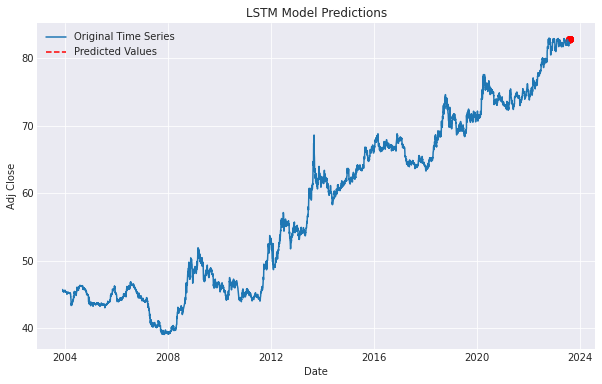

In [ ]:
# Convert the predicted_values to a pandas Series with appropriate dates
predicted_dates = pd.date_range(start=forex_data["Date"].iloc[-1], periods=len(predicted_values)+1, closed='right')
predicted_series = pd.Series(predicted_values, index=predicted_dates)

# Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(forex_data["Date"], forex_data["Adj Close"], label='Original Time Series')
plt.plot(predicted_series.index, predicted_series, label='Predicted Values', color='red', linestyle='dashed')
plt.scatter(predicted_series.index, predicted_series, color='red')  # Add individual points for predicted values
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('LSTM Model Predictions')
plt.legend()
plt.show()


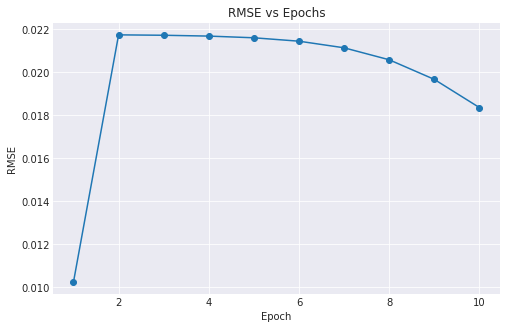

In [ ]:
# Plot RMSE values with respect to epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), [np.mean(rmse) for rmse in rmse_values], marker='o')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs Epochs')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Define a function to conduct an experiment with given hyperparameters
def run_experiment(input_size, hidden_size, output_size, learning_rate, num_epochs):
    # Training the LSTM model
    lstm_model = LSTMModel(input_size, hidden_size, output_size, learning_rate)

    # Lists to store loss and RMSE values for each epoch
    losses = []
    rmse_values = []

    for epoch in range(num_epochs):
        loss = 0
        for row in train_data.rdd.collect():
            features = row["features"]
            target = row["target"]
            prediction = lstm_model.forward(features)
            loss += np.square(prediction - target)
            d_y = 2 * (prediction - target)
            d_Wxh, d_Whh, d_Why, d_bh, d_by = lstm_model.backward(d_y)
            lstm_model.update_parameters(d_Wxh, d_Whh, d_Why, d_bh, d_by)

        # Calculate RMSE for the current epoch
        rmse = np.sqrt(loss / len(train_data.rdd.collect()))  # Calculate RMSE using the target values

        # Store the loss and RMSE values for plotting
        losses.append(loss.squeeze())
        rmse_values.append(rmse.squeeze())

    # Calculate the training accuracy and RMSE
    train_accuracy = 1 - (losses[-1] / len(train_data.rdd.collect()))
    train_rmse = rmse_values[-1]

    # Calculate the test accuracy and RMSE
    # For simplicity, we'll use the last prediction for the test accuracy and RMSE
    test_prediction = lstm_model.forward(X[-1])
    test_loss = np.square(test_prediction - y[-1])
    test_rmse = np.mean(np.sqrt(test_loss))

    return train_accuracy, test_rmse, train_rmse


In [ ]:
# Define hyperparameters for the three experiments
experiments = [
    {"input_size": 1, "hidden_size": 4, "output_size": 1, "learning_rate": 0.1, "num_epochs": 10},
    {"input_size": 1, "hidden_size": 4, "output_size": 1, "learning_rate": 0.1, "num_epochs": 100}
]

# Data to store the results
results = []

# Run the experiments
for i, experiment in enumerate(experiments):
    train_accuracy, test_rmse, train_rmse = run_experiment(**experiment)
    results.append({
        "Experiment": f"Experiment {i+1}",
        "Parameters Chosen": experiment,
        "Train Accuracy": train_accuracy,
        "Test RMSE": test_rmse,
        "Train RMSE": train_rmse
    })

# Create a DataFrame to display the results in a table
print(results)

results_df = pd.DataFrame(results)

# Print the results table
print(results_df)

[{'Experiment': 'Experiment 1', 'Parameters Chosen': {'input_size': 1, 'hidden_size': 4, 'output_size': 1, 'learning_rate': 0.1, 'num_epochs': 10}, 'Train Accuracy': 0.9996486393798376, 'Test RMSE': 0.16306957516933782, 'Train RMSE': array(0.01874462)}, {'Experiment': 'Experiment 2', 'Parameters Chosen': {'input_size': 1, 'hidden_size': 4, 'output_size': 1, 'learning_rate': 0.1, 'num_epochs': 100}, 'Train Accuracy': 0.9999478399413911, 'Test RMSE': 0.5699059267201213, 'Train RMSE': array(0.00722219)}]
     Experiment                                  Parameters Chosen  \
0  Experiment 1  {'input_size': 1, 'hidden_size': 4, 'output_si...   
1  Experiment 2  {'input_size': 1, 'hidden_size': 4, 'output_si...   

   Train Accuracy  Test RMSE            Train RMSE  
0        0.999649   0.163070  0.018744615764597298  
1        0.999948   0.569906  0.007222192091662242  


In [ ]:
results_df

,Experiment,Parameters Chosen,Train Accuracy,Test RMSE,Train RMSE
0,Experiment 1,"{'input_size': 1, 'hidden_size': 4, 'output_si...",0.999649,0.163070,0.018744615764597298
1,Experiment 2,"{'input_size': 1, 'hidden_size': 4, 'output_si...",0.999948,0.569906,0.007222192091662242
